## Importing Libraries

In [1]:
import torch
import torch.optim as optim
from torchvision import datasets, transforms

In [2]:
from utils import *
from model_2 import *

## Transformations applied on train and test data

In [3]:
# Train Phase transformations
train_transforms = transforms.Compose([
                                       transforms.RandomApply([transforms.CenterCrop(22), ], p=0.1),
                                       transforms.RandomRotation((-15., 15.), fill=0),
                                       transforms.Resize((28, 28)),
                                       transforms.ColorJitter(brightness=0.10, contrast=0.1, saturation=0.10, hue=0.1),
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.1307,), (0.3081,))
                                       ])

# Test Phase transformations
test_transforms = transforms.Compose([transforms.ToTensor(),
                                      transforms.Normalize((0.1307,), (0.3081,))
                                       ])

## Downloading data

In [4]:
train_data = datasets.MNIST('../data', train=True, download=True, transform=train_transforms)
test_data = datasets.MNIST('../data', train=False, download=True, transform=test_transforms)

In [5]:
batch_size = 128

kwargs = {'batch_size': batch_size, 'shuffle': True, 'num_workers': 2, 'pin_memory': True}

train_loader = torch.utils.data.DataLoader(train_data, **kwargs)
test_loader = torch.utils.data.DataLoader(test_data, **kwargs)

## Sample image

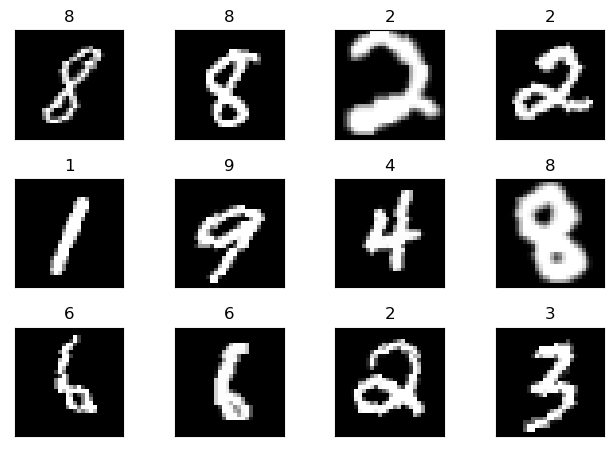

In [6]:

batch_data, batch_label = next(iter(train_loader)) 

fig = plt.figure()

for i in range(12):
  plt.subplot(3,4,i+1)
  plt.tight_layout()
  plt.imshow(batch_data[i].squeeze(0), cmap='gray')
  plt.title(batch_label[i].item())
  plt.xticks([])
  plt.yticks([])

## Neural net summary

In [7]:
get_summary(Net)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 26, 26]             144
              ReLU-2           [-1, 16, 26, 26]               0
       BatchNorm2d-3           [-1, 16, 26, 26]              32
           Dropout-4           [-1, 16, 26, 26]               0
            Conv2d-5           [-1, 32, 24, 24]           4,608
              ReLU-6           [-1, 32, 24, 24]               0
       BatchNorm2d-7           [-1, 32, 24, 24]              64
           Dropout-8           [-1, 32, 24, 24]               0
         MaxPool2d-9           [-1, 32, 12, 12]               0
           Conv2d-10           [-1, 10, 12, 12]             320
           Conv2d-11           [-1, 16, 10, 10]           1,440
             ReLU-12           [-1, 16, 10, 10]               0
      BatchNorm2d-13           [-1, 16, 10, 10]              32
          Dropout-14           [-1, 16,

<function torchsummary.torchsummary.summary(model, input_size, batch_size=-1, device='cuda')>

## Training the data and calculating validation results

In [8]:
train_losses = []
test_losses = []
train_acc = []
test_acc = []

test_incorrect_pred = {'images': [], 'ground_truths': [], 'predicted_vals': []}

In [9]:
model = Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
train_criterion = nn.CrossEntropyLoss() #Loss function
test_criterion = nn.CrossEntropyLoss() #Loss function
num_epochs = 15

for epoch in range(1, num_epochs+1):
    print(f'Epoch {epoch}')
    train_acc_val, train_loss = train(model, device, train_loader, optimizer, train_criterion)
    print(train_acc_val)
    test_acc_val, test_loss = test(model, device, test_loader, test_criterion)
    
    train_acc.append(train_acc_val) #Storing training loss for each epoch
    train_losses.append(train_loss)
    test_acc.append(test_acc_val) #Storing testing loss for each epoch
    test_losses.append(test_loss)


Epoch 1


Train: Loss=0.1566 Batch_id=468 Accuracy=86.82: 100%|█| 469/469 [01:03<00:00,  7

86.81833333333333


Test set: Average loss: 0.0784, Accuracy: 9794/10000 (97.94%)

Epoch 2


Train: Loss=0.0396 Batch_id=468 Accuracy=96.79: 100%|█| 469/469 [01:04<00:00,  7

96.79


Test set: Average loss: 0.0494, Accuracy: 9871/10000 (98.71%)

Epoch 3


Train: Loss=0.0513 Batch_id=468 Accuracy=97.53: 100%|█| 469/469 [01:04<00:00,  7

97.52666666666667


Test set: Average loss: 0.0343, Accuracy: 9895/10000 (98.95%)

Epoch 4


Train: Loss=0.0379 Batch_id=468 Accuracy=97.88: 100%|█| 469/469 [01:06<00:00,  7

97.88333333333334


Test set: Average loss: 0.0286, Accuracy: 9915/10000 (99.15%)

Epoch 5


Train: Loss=0.0179 Batch_id=468 Accuracy=98.12: 100%|█| 469/469 [01:04<00:00,  7

98.125


Test set: Average loss: 0.0280, Accuracy: 9910/10000 (99.10%)

Epoch 6


Train: Loss=0.0657 Batch_id=468 Accuracy=98.17: 100%|█| 469/469 [00:40<00:00, 11

98.17


Test set: Average loss: 0.0244, Accuracy: 9917/10000 (99.17%)

Epoch 7


Train: Loss=0.0797 Batch_id=468 Accuracy=98.40: 100%|█| 469/469 [01:06<00:00,  7

98.40166666666667


Test set: Average loss: 0.0229, Accuracy: 9924/10000 (99.24%)

Epoch 8


Train: Loss=0.0199 Batch_id=468 Accuracy=98.36: 100%|█| 469/469 [01:04<00:00,  7

98.36166666666666


Test set: Average loss: 0.0226, Accuracy: 9928/10000 (99.28%)

Epoch 9


Train: Loss=0.0557 Batch_id=468 Accuracy=98.38: 100%|█| 469/469 [01:31<00:00,  5

98.375


Test set: Average loss: 0.0218, Accuracy: 9927/10000 (99.27%)

Epoch 10


Train: Loss=0.0250 Batch_id=468 Accuracy=98.61: 100%|█| 469/469 [01:30<00:00,  5

98.61


Test set: Average loss: 0.0237, Accuracy: 9922/10000 (99.22%)

Epoch 11


Train: Loss=0.1694 Batch_id=468 Accuracy=98.54: 100%|█| 469/469 [01:37<00:00,  4

98.54166666666667


Test set: Average loss: 0.0214, Accuracy: 9937/10000 (99.37%)

Epoch 12


Train: Loss=0.0095 Batch_id=468 Accuracy=98.67: 100%|█| 469/469 [01:50<00:00,  4

98.665


Test set: Average loss: 0.0198, Accuracy: 9939/10000 (99.39%)

Epoch 13


Train: Loss=0.0227 Batch_id=468 Accuracy=98.64: 100%|█| 469/469 [01:53<00:00,  4

98.635


Test set: Average loss: 0.0230, Accuracy: 9927/10000 (99.27%)

Epoch 14


Train: Loss=0.1964 Batch_id=468 Accuracy=98.66: 100%|█| 469/469 [02:02<00:00,  3

98.655


Test set: Average loss: 0.0184, Accuracy: 9944/10000 (99.44%)

Epoch 15


Train: Loss=0.0294 Batch_id=468 Accuracy=98.76: 100%|█| 469/469 [02:25<00:00,  3

98.75833333333334


Test set: Average loss: 0.0176, Accuracy: 9944/10000 (99.44%)



## Plots

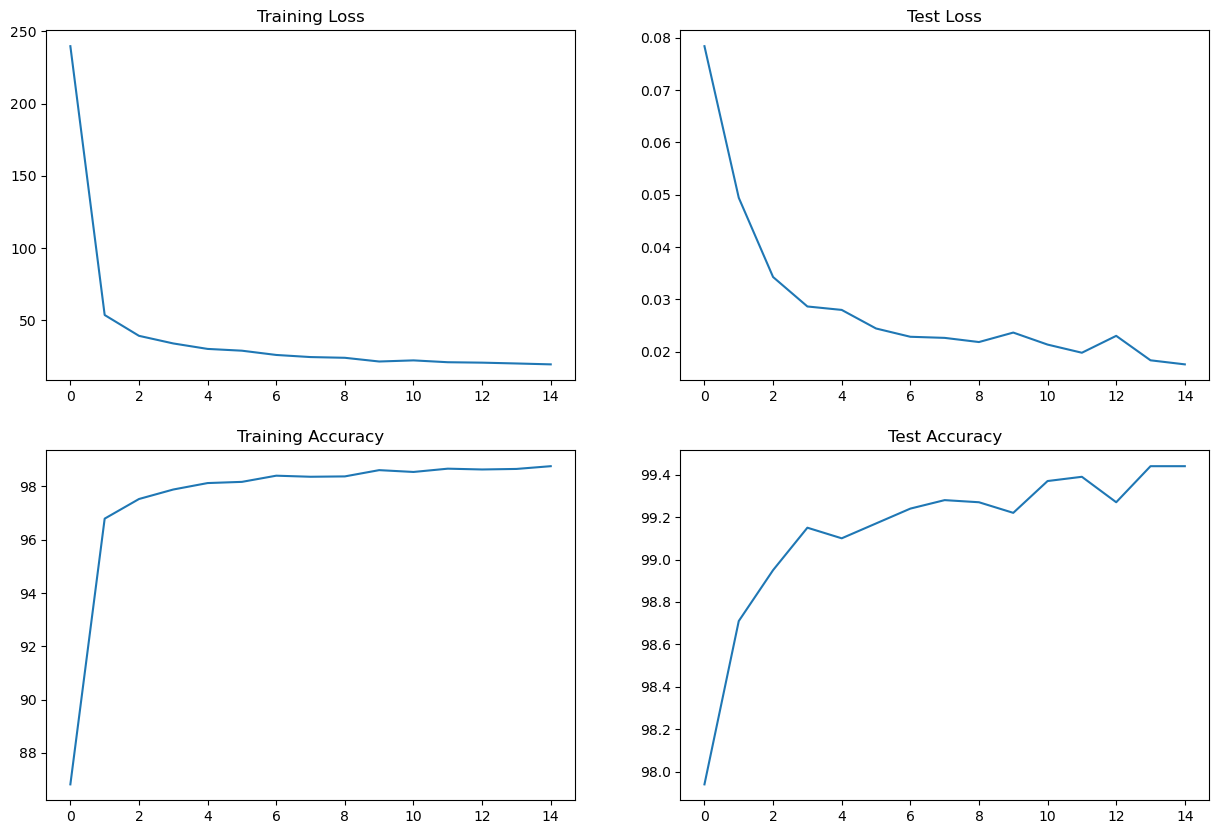

In [10]:
plot_loss(train_losses, train_acc, test_losses, test_acc)


### Target:

* Change in structure
    - Add batch normalisation
    - Remove second max pooling. In the initial run of model 2, I had 2 max pooling layers but the accuracy was detoriating as the pooling layer was close to the output layer. Hence removed it. 
    - Add GAP
    - Transform training data
    - Increased the parameters slighty to reach closer to target accuracy. (Will reduce that in the next run)
    - Added drop out layers

### Results:
* Parameters: 13968
* Best Training Accuracy: 98.76
* Best Test Accuracy: 99.44

### Analysis:
* Train accuracy is less than test accuracy (No over fitting) - This is due to adding train transformation and dropout layers
* Added batch normalisation, GAP to improve the accuracy
* Value is oscillating a lot (Learning rate issue)

### To do:

* Reduce the epoch to 15 for the final iterations
* To compensate for lesser epoch, reduce the batch size
* Accuracy fluctuating around a number. Add better learning rate formula
* Reduce number of parameters by changing the channel and kernal size.